In [1]:
import os
import torch
import pandas as pd

PATH = "./dataset/"

train_df = pd.read_csv(os.path.join(PATH, "train_set.csv"))
test_df = pd.read_csv(os.path.join(PATH, "test_set.csv"))

In [2]:
train_df.head()

,index,SMILES,Reorg_g,Reorg_ex
0,train_0,CC[C@H]1CCCCN1C(=O)[C@@H](C)OC(=O)c1c(C)oc(-n2...,0.631486,0.535060
1,train_1,O[C@@H](CNC1CC1)CN1CCc2sccc2C1,0.825901,1.116781
2,train_2,N#CCCNC(=O)[C@@]1(O)CCSC1,1.463943,0.964848
3,train_3,COC[C@H]1CN(c2ccc(OCC[C@@H](C)O)cc2)C(=O)O1,0.166669,0.161458
4,train_4,N#Cc1c(-c2ccccc2OCC(N)=O)[nH]c(C(N)=O)c1N,0.313820,0.338862


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import scale
from tqdm.auto import tqdm
import glob2, os
import numpy as np

path = os.path.join("./dataset", "mol_files", "train_set")
mol_file_path_lst = sorted(glob2.glob(os.path.join(path,"*.mol")))
mol = Chem.MolFromMolFile(mol_file_path_lst[0], removeHs = False, sanitize = True)

atoms=[a for a in mol.GetAtoms()]
for a in atoms:
    print( a.GetIdx(), a.GetSymbol() )

0 C
1 C
2 C
3 C
4 C
5 C
6 C
7 N
8 C
9 O
10 C
11 C
12 O
13 C
14 O
15 C
16 C
17 C
18 O
19 C
20 N
21 C
22 C
23 C
24 C
25 C
26 C
27 N
28 H
29 H
30 H
31 H
32 H
33 H
34 H
35 H
36 H
37 H
38 H
39 H
40 H
41 H
42 H
43 H
44 H
45 H
46 H
47 H
48 H
49 H
50 H
51 H
52 H


In [4]:
from rdkit.Chem import AllChem
print(AllChem.MolToMolBlock(mol))


     RDKit          3D

 53 55  0  0  0  0  0  0  0  0999 V2000
    3.0263   -2.3512    0.5507 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4398   -0.9997    1.1366 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3570    0.1784    0.1392 C   0  0  1  0  0  0  0  0  0  0  0  0
    1.9344    0.5133   -0.3583 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0782    1.2336    0.6877 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8074    2.4846    1.1839 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2042    2.1347    1.6952 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9824    1.3938    0.6950 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.3098    1.7286    0.5618 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.8180    2.6625    1.1588 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.1704    0.9343   -0.4511 C   0  0  1  0  0  0  0  0  0  0  0  0
    6.1652    1.6104   -1.8172 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.5285    0.9327   -0.0090 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.8120    0.2595    1

In [5]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors

text = train_df.iloc[128]['SMILES']

In [6]:
smiles = text
mol = Chem.MolFromSmiles(smiles)
adj = Chem.GetAdjacencyMatrix(mol)
dist = Chem.GetDistanceMatrix(mol)

for idx_i, atom in enumerate(mol.GetAtoms()):
    for bond in atom.GetBonds():
        start = bond.GetBeginAtomIdx()
        end = bond.GetEndAtomIdx()
        d = dist[start, end]
        bond_type = bond.GetBondType().name
        print("d : {}, bond_type : {}".format(d, bond_type))
        print("idx_i : {}, start : {}, end : {}".format(idx_i, start, end))


d : 1.0, bond_type : SINGLE
idx_i : 0, start : 0, end : 1
d : 1.0, bond_type : SINGLE
idx_i : 1, start : 0, end : 1
d : 1.0, bond_type : AROMATIC
idx_i : 1, start : 1, end : 2
d : 1.0, bond_type : AROMATIC
idx_i : 1, start : 31, end : 1
d : 1.0, bond_type : AROMATIC
idx_i : 2, start : 1, end : 2
d : 1.0, bond_type : AROMATIC
idx_i : 2, start : 2, end : 3
d : 1.0, bond_type : AROMATIC
idx_i : 3, start : 2, end : 3
d : 1.0, bond_type : SINGLE
idx_i : 3, start : 3, end : 4
d : 1.0, bond_type : AROMATIC
idx_i : 3, start : 3, end : 30
d : 1.0, bond_type : SINGLE
idx_i : 4, start : 3, end : 4
d : 1.0, bond_type : AROMATIC
idx_i : 4, start : 4, end : 5
d : 1.0, bond_type : AROMATIC
idx_i : 4, start : 28, end : 4
d : 1.0, bond_type : AROMATIC
idx_i : 5, start : 4, end : 5
d : 1.0, bond_type : SINGLE
idx_i : 5, start : 5, end : 6
d : 1.0, bond_type : AROMATIC
idx_i : 5, start : 5, end : 7
d : 1.0, bond_type : SINGLE
idx_i : 6, start : 5, end : 6
d : 1.0, bond_type : AROMATIC
idx_i : 7, start : 

In [13]:
# analysis on trainset
from tqdm.auto import tqdm

atom_list = []
atom_degree_list = []
atom_numhs_list = []
atom_valence_list = []
atom_aromatic_list = []
atom_ring_list = []
atom_charge_list = []
atom_hybrid_list = []

bond_type_list = []
bond_aromatic_list = []
bond_conjugated_list = []
bond_ring_list = []
bond_stereo_list = []
bond_dist_list = []

for smiles in train_df['SMILES']:

    mol = Chem.MolFromSmiles(smiles)
    adj = Chem.GetAdjacencyMatrix(mol)
    dist = Chem.GetDistanceMatrix(mol)

    for idx_i, atom in enumerate(mol.GetAtoms()):
        atom_list.append(atom.GetAtomicNum())
        atom_degree_list.append(atom.GetDegree())
        atom_numhs_list.append(atom.GetTotalNumHs())
        atom_valence_list.append(atom.GetImplicitValence())
        atom_aromatic_list.append(atom.GetIsAromatic())
        atom_ring_list.append(atom.IsInRing())
        atom_charge_list.append(atom.GetFormalCharge())
        atom_hybrid_list.append(atom.GetHybridization())

        for bond in atom.GetBonds():
            start = bond.GetBeginAtomIdx()
            end = bond.GetEndAtomIdx()
            d = dist[start, end]
            bond_type = bond.GetBondType().name

            bond_type_list.append(bond_type)
            bond_aromatic_list.append(bond.GetIsAromatic())
            bond_conjugated_list.append(bond.GetIsConjugated())
            bond_ring_list.append(bond.IsInRing())
            bond_stereo_list.append(bond.GetStereo())
            bond_dist_list.append(d)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

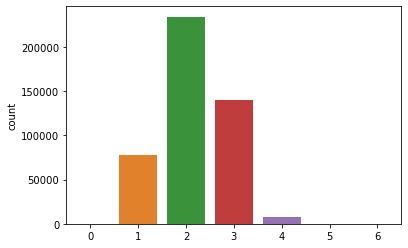

In [8]:
import seaborn as sns
sns.countplot(atom_degree_list)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

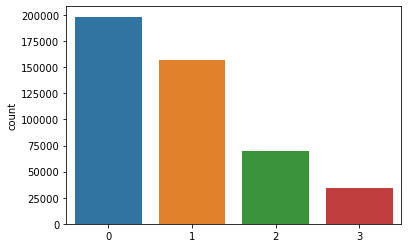

In [9]:
import seaborn as sns
sns.countplot(atom_numhs_list)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

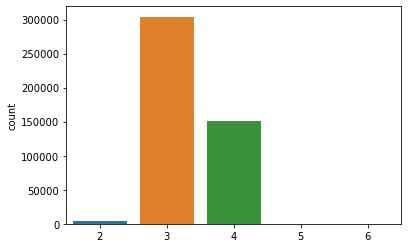

In [10]:
import seaborn as sns
sns.countplot(atom_hybrid_list)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

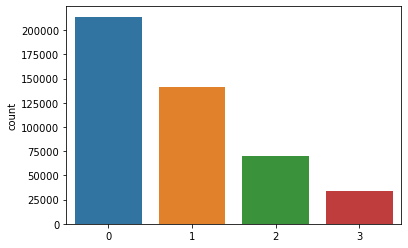

In [11]:
sns.countplot(atom_valence_list)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

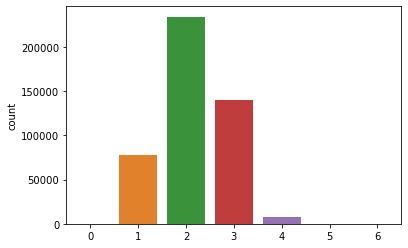

In [12]:
sns.countplot(atom_degree_list)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

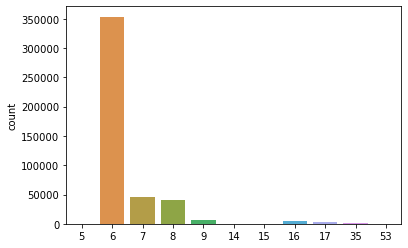

In [14]:
sns.countplot(atom_list)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

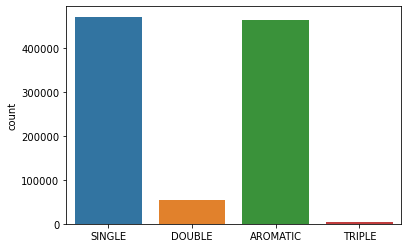

In [15]:
sns.countplot(bond_type_list)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

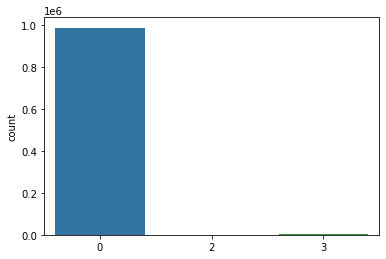

In [16]:
sns.countplot(bond_stereo_list)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

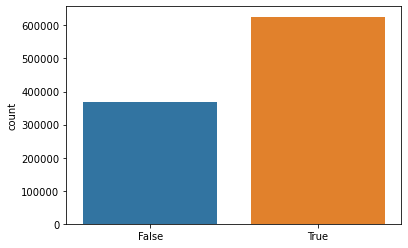

In [17]:
sns.countplot(bond_conjugated_list)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

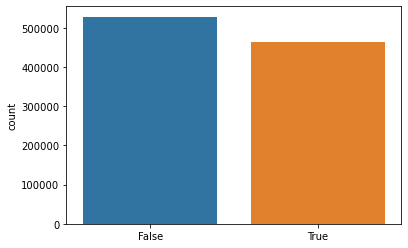

In [18]:
sns.countplot(bond_aromatic_list)

In [19]:
import numpy as np
atom_degree_list = np.unique(np.array(atom_degree_list))
atom_numhs_list = np.unique(np.array(atom_numhs_list))
atom_valence_list = np.unique(np.array(atom_valence_list))
atom_aromatic_list = np.unique(np.array(atom_aromatic_list))
atom_ring_list = np.unique(np.array(atom_ring_list))
atom_charge_list = np.unique(np.array(atom_charge_list))
atom_hybrid_list = np.unique(np.array(atom_hybrid_list))

bond_type_list = np.unique(np.array(bond_type_list))
bond_aromatic_list = np.unique(np.array(bond_aromatic_list))
bond_conjugated_list = np.unique(np.array(bond_conjugated_list))
bond_ring_list = np.unique(np.array(bond_ring_list))
bond_stereo_list = np.unique(np.array(bond_stereo_list))
bond_dist_list = np.unique(np.array(bond_dist_list))

print("atom degree : ", atom_degree_list)
print("atom numhs : ", atom_numhs_list)
print("atom valence : ", atom_valence_list)
print("atom aromatic : ", atom_aromatic_list)
print("atom ring : ", atom_ring_list)
print("atom charge : ", atom_charge_list)
print("atom hybrid : ", atom_hybrid_list)

print("bond type : ", bond_type_list)
print("bond aromatic : ", bond_aromatic_list)
print("bond conjugated : ", bond_conjugated_list)
print("bond ring : ", bond_ring_list)
print("bond stereo : ", bond_stereo_list)
print("bond dist : ", bond_dist_list)

atom degree :  [0 1 2 3 4 5 6]
atom numhs :  [0 1 2 3]
atom valence :  [0 1 2 3]
atom aromatic :  [False  True]
atom ring :  [False  True]
atom charge :  [0]
atom hybrid :  [2 3 4 5 6]
bond type :  ['AROMATIC' 'DOUBLE' 'SINGLE' 'TRIPLE']
bond aromatic :  [False  True]
bond conjugated :  [False  True]
bond ring :  [False  True]
bond stereo :  [0 2 3]
bond dist :  [1.]


In [14]:
total_smiles = pd.concat([train_df[['SMILES','index']] , test_df[['SMILES', 'index']]], axis = 0).reset_index(drop = True)

In [15]:
from tqdm.auto import tqdm

atom_degree_list = []
atom_numhs_list = []
atom_valence_list = []
atom_aromatic_list = []
atom_ring_list = []
atom_charge_list = []
atom_hybrid_list = []

bond_type_list = []
bond_aromatic_list = []
bond_conjugated_list = []
bond_ring_list = []
bond_stereo_list = []
bond_dist_list = []

for smiles in total_smiles['SMILES']:

    mol = Chem.MolFromSmiles(smiles)
    adj = Chem.GetAdjacencyMatrix(mol)
    dist = Chem.GetDistanceMatrix(mol)

    for idx_i, atom in enumerate(mol.GetAtoms()):
        atom_degree_list.append(atom.GetDegree())
        atom_numhs_list.append(atom.GetTotalNumHs())
        atom_valence_list.append(atom.GetImplicitValence())
        atom_aromatic_list.append(atom.GetIsAromatic())
        atom_ring_list.append(atom.IsInRing())
        atom_charge_list.append(atom.GetFormalCharge())
        atom_hybrid_list.append(atom.GetHybridization())

        for bond in atom.GetBonds():
            start = bond.GetBeginAtomIdx()
            end = bond.GetEndAtomIdx()
            d = dist[start, end]
            bond_type = bond.GetBondType().name

            bond_type_list.append(bond_type)
            bond_aromatic_list.append(bond.GetIsAromatic())
            bond_conjugated_list.append(bond.GetIsConjugated())
            bond_ring_list.append(bond.IsInRing())
            bond_stereo_list.append(bond.GetStereo())
            bond_dist_list.append(d)

import numpy as np

atom_degree_list = np.unique(np.array(atom_degree_list))
atom_numhs_list = np.unique(np.array(atom_numhs_list))
atom_valence_list = np.unique(np.array(atom_valence_list))
atom_aromatic_list = np.unique(np.array(atom_aromatic_list))
atom_ring_list = np.unique(np.array(atom_ring_list))
atom_charge_list = np.unique(np.array(atom_charge_list))
atom_hybrid_list = np.unique(np.array(atom_hybrid_list))

bond_type_list = np.unique(np.array(bond_type_list))
bond_aromatic_list = np.unique(np.array(bond_aromatic_list))
bond_conjugated_list = np.unique(np.array(bond_conjugated_list))
bond_ring_list = np.unique(np.array(bond_ring_list))
bond_stereo_list = np.unique(np.array(bond_stereo_list))
bond_dist_list = np.unique(np.array(bond_dist_list))

In [16]:
print("atom degree : ", atom_degree_list)
print("atom numhs : ", atom_numhs_list)
print("atom valence : ", atom_valence_list)
print("atom aromatic : ", atom_aromatic_list)
print("atom ring : ", atom_ring_list)
print("atom charge : ", atom_charge_list)
print("atom hybrid : ", atom_hybrid_list)

print("bond type : ", bond_type_list)
print("bond aromatic : ", bond_aromatic_list)
print("bond conjugated : ", bond_conjugated_list)
print("bond ring : ", bond_ring_list)
print("bond stereo : ", bond_stereo_list)
print("bond dist : ", bond_dist_list)

atom degree :  [0 1 2 3 4 5 6]
atom numhs :  [0 1 2 3]
atom valence :  [0 1 2 3]
atom aromatic :  [False  True]
atom ring :  [False  True]
atom charge :  [0]
atom hybrid :  [2 3 4 5 6]
bond type :  ['AROMATIC' 'DOUBLE' 'SINGLE' 'TRIPLE']
bond aromatic :  [False  True]
bond conjugated :  [False  True]
bond ring :  [False  True]
bond stereo :  [0 2 3]
bond dist :  [1.]


/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


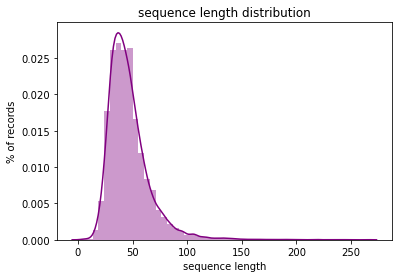

In [19]:
# For bert model eda
# checkout the frequency of the smiles character
import matplotlib.pyplot as plt
import seaborn as sns

total_smiles['len'] = total_smiles['SMILES'].apply(lambda x : len(list(x)))

plt.figure()
sns.distplot(total_smiles['len'], hist = True, color = 'purple', axlabel = "sequence length")
plt.title('sequence length distribution')
plt.ylabel('% of records')
plt.show()

In [20]:
corpus = total_smiles['SMILES']
corpus['sequence'] = corpus.map(list)

alphabet_list = []

from tqdm.auto import tqdm
for corpus in tqdm(corpus['sequence'].values):
    corpus = np.unique(corpus).tolist()
    alphabet_list.extend(corpus)

alphabet_combination = np.unique(alphabet_list)

print("total alphabet : ", len(alphabet_combination))

# dictionary
char2idx = {}
idx2char = {}

for idx, char in enumerate(alphabet_combination):
    idx2char[idx] = char
    char2idx[char] = idx

idx2char[idx+1] = '<PAD>'
char2idx['<PAD>'] = idx+1

/tmp/ipykernel_13358/3186602496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['sequence'] = corpus.map(list)


  0%|          | 0/18614 [00:00<?, ?it/s]

total alphabet :  39


In [22]:
alphabet_combination

array(['#', '%', '(', ')', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '=', '@', 'B', 'C', 'F', 'H', 'I', 'N', 'O',
       'P', 'S', '[', '\\', ']', 'c', 'i', 'l', 'n', 'o', 'p', 'r', 's'],
      dtype='<U1')